In [136]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk
import seaborn as sb

Carregando Base de Dados

In [137]:
dataset = pd.read_csv('loan_data.csv')

Limpando dataset

In [138]:
#Removendo coluna de ID
dataset = dataset.drop('Loan_ID',axis=1)


In [139]:
#removendo colunas nulas
dataset = dataset.dropna()

dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [140]:
mapping = {"Y":1,"N":0}
dataset['Loan_Status'] = dataset.Loan_Status.map(mapping)

Definindo variáveis

In [141]:
x = dataset.drop('Loan_Status',axis=1)
y = dataset['Loan_Status']

Tratando o x - Variaveis Categoricas

In [142]:
x.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [143]:
categorical_column = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

Caso fossem apenas duas opçoes de dados

In [144]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# x[categorical_column] = x[categorical_column].apply(le.fit_transform)    



Para mais opçoes de dados

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_column)],remainder='passthrough')
x = ct.fit_transform(x)



Separação de Teste e Treino

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

y_train.count()

246

In [190]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


MPL

In [210]:
ann = tf.keras.models.Sequential()

#adicionando cada neuronio
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [211]:
history_train = ann.fit(x_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 1s 27ms/step - loss: 0.6981 - accuracy: 0.5385 - val_loss: 0.6850 - val_accuracy: 0.7200
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6538 - accuracy: 0.6833 - val_loss: 0.6720 - val_accuracy: 0.7200
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6234 - accuracy: 0.7104 - val_loss: 0.6608 - val_accuracy: 0.7200
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5988 - accuracy: 0.7059 - val_loss: 0.6507 - val_accuracy: 0.7200
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5785 - accuracy: 0.7059 - val_loss: 0.6380 - val_accuracy: 0.7200
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5614 - accuracy: 0.7104 - val_loss: 0.6252 - val_accuracy: 0.7200
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5447 - accuracy: 0.7104 - val_loss: 0.6166 - val_accuracy: 0.7200
Epoch 8/50
7/7 [=================

Text(0, 0.5, 'loss')

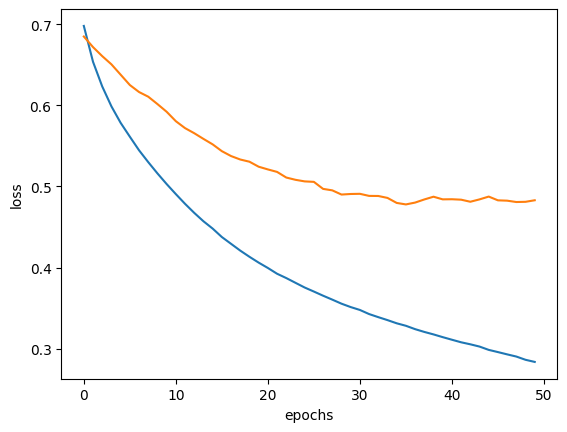

In [212]:
import matplotlib.pyplot as plt
sb.lineplot(data=history_train.history["loss"])
sb.lineplot(data=history_train.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

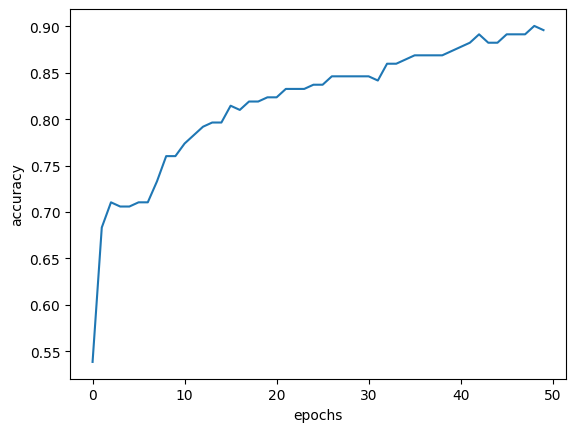

In [213]:
sb.lineplot(data=history_train.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")

Passando meu dataset de teste

In [214]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_hat = ann.predict(x_test)
y_hat = np.where(y_hat>0.5,1,0)

2/2 [==============================] - 0s 3ms/step


In [215]:
accuracy_score(y_test,y_hat)

0.8870967741935484

<Axes: >

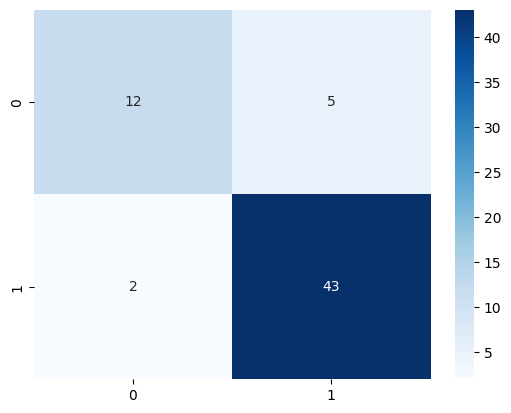

In [216]:

sb.heatmap(confusion_matrix(y_test,y_hat),annot=True,cmap='Blues',fmt='g')